# Listing 2-1. Import TensorFlow and numpy Library and check if EagerExecution is True

In [2]:
from platform import python_version
import tensorflow as tf
import numpy as np
import os
import warnings
warnings.filterwarnings('ignore')
print(f"Python version: {python_version()}")
print(f"Tensorflow version: {tf.__version__}")
os.environ['TF_CPP_MIN_LOG_LEVE L'] = '3'
tf.executing_eagerly()


Python version: 3.9.5
Tensorflow version: 2.9.1


True



# Listing 2-2. Defining Zeros and Ones Tensors 

In [8]:
# With eager execution we will be able to see the values of the tensor
a = tf.zeros((2,2))
print('a',a)
b = tf.ones((2,2))
print('b',b)

a tf.Tensor(
[[0. 0.]
 [0. 0.]], shape=(2, 2), dtype=float32)
b tf.Tensor(
[[1. 1.]
 [1. 1.]], shape=(2, 2), dtype=float32)


# Listing 2-3. Sum the elements of the matrix (2D Tensor) across the horizontal axis 

In [9]:
out = tf.math.reduce_sum(b,axis=1)
print(out)

tf.Tensor([2. 2.], shape=(2,), dtype=float32)


# Listing 2-4. Check the shape of the Tensor

In [10]:
a.get_shape()

TensorShape([2, 2])

# Listing 2-5. Reshaping a Tensor  

In [11]:
a_ = tf.reshape(a,(1,4))
print(a_)

tf.Tensor([[0. 0. 0. 0.]], shape=(1, 4), dtype=float32)


# Listing 2-6. Converting a Tensor to Numpy

In [12]:
ta = a.numpy()
print(ta) 

[[0. 0.]
 [0. 0.]]


# Listing 2-7.Defining TensorFlow Constants

In [13]:
# Tensorflow constants are immutable 
a = tf.constant(2)
b = tf.constant(5)
c= a*b 
print(c)

tf.Tensor(10, shape=(), dtype=int32)


# Listing 2-8 Illustration of difference between Eager Execution and Graph based execution

In [14]:
import timeit
# Eager function
def func_eager(a,b):
    return a*b
# Graph function using tf.function on eager func
@tf.function
def graph_func(a,b):
    return a*b

a = tf.constant([2])
b = tf.constant([5])

# Eager execution
print("Eager execution:",func_eager(a,b))
# Function with graph execution  
print("Graph execution:",graph_func(a,b))

Eager execution: tf.Tensor([10], shape=(1,), dtype=int32)
Graph execution: tf.Tensor([10], shape=(1,), dtype=int32)


# Listing 2-9 Execution time comparison of Eager Execution vs Graph Execution in Simple Operation

In [15]:
import timeit
# Eager function
def func_eager(a,b):
    return a*b
# Graph function using tf.function on eager func
@tf.function
def graph_func(a,b):
    return a*b

a = tf.constant([2])
b = tf.constant([5])

# Eager execution
print("Eager execution:",timeit.timeit(lambda:func_eager(a,b),number=100))
# Function with graph execution  
print("Graph execution:",timeit.timeit(lambda: graph_func(a,b),number=100))
print("For simple operations Graph execution takes more time..")

Eager execution: 0.0026365599915152416
Graph execution: 0.0544749020045856
For simple operations Graph execution takes more time..


# Listing 2-10 Execution time comparison of Eager Execution vs Graph Execution in a model inference

In [16]:
from tensorflow.keras import Input, Model
from tensorflow.keras.layers import Flatten, Dense

# Define the model (Inspired by mnist inputs)
model = tf.keras.Sequential()
model.add(tf.keras.Input(shape=(28,28,)))
model.add(Flatten())
model.add(Dense(256,"relu"))
model.add(Dense(128,"relu"))
model.add(Dense(256,"relu"))
model.add(Dense(10,"softmax"))
# Dummy data with MNIST image sizes 
X = tf.random.uniform([1000, 28, 28])


# Eager Execution to do inference (Model untrained as we are evauating speed of inference)
eager_model = model
print("Eager time:", timeit.timeit(lambda: eager_model(X,training=False), number=10000))

#Graph Execution to do inference (Model untrained as we are evauating speed of inference)
graph_model = tf.function(eager_model) # Wrap the model with tf.function 
print("Graph time:", timeit.timeit(lambda: graph_model(X,training=False), number=10000))

Eager time: 46.46772461201181
Graph time: 23.970114473006106


# Listing 2-11. Defining TensorFlow variables 


In [17]:
w = tf.Variable([5.,10])

print('Intial value of Variable w =', w.numpy())
w.assign([2.,2.])
print('New assigned value of Variable w =', w.numpy())

Intial value of Variable w = [ 5. 10.]
New assigned value of Variable w = [2. 2.]


# Listing 2-12.Converting a Numpy array to Tensor

In [18]:
nt = np.random.randn(5,3)
nt_tensor = tf.convert_to_tensor(nt)
print(nt_tensor)

tf.Tensor(
[[-0.78527151 -0.24655196 -1.46398214]
 [ 0.52133169  1.32163985  0.14126499]
 [ 0.67573942  0.37336583  0.73968285]
 [ 0.5907797   0.03879883 -0.28792242]
 [-3.00804685  0.69147973  1.11958851]], shape=(5, 3), dtype=float64)


# Listing 2-13. Computing Gradient 

In [19]:
#Tensorflow needs to remember the order of operation in forward pass so that during the backward pass 
#(backpropagation) TensorFlow can traverse the list of operations in reverse order to compute gradients
#tf.GradientTape is precisely the method that provides a way of recording relevant operations executed within its scope so that the information 
#can be used to compute the gradient  
x = tf.Variable(2.0)

with tf.GradientTape() as tape:
    y = x**3

dy_dx = tape.gradient(y,x) # Compute gradient of y wrt to x at x =2. 

print(dy_dx.numpy()) # dy/dx = ( 3(x^2) at x = 2 ) == 3*(2^2) = 12.0

12.0


# Listing 2-14 Gradient with respect to Model 

In [20]:
from tensorflow.keras import Input, Model
from tensorflow.keras.layers import Flatten, Dense

# Define the model 
model = tf.keras.Sequential()
model.add(tf.keras.Input(shape=(2,)))
model.add(Dense(5,'relu'))
model.add(Dense(1))
print(model.summary())

X = tf.constant([[2,2],[1,1]])
y = tf.constant([3.4,4.7])
with tf.GradientTape() as tape:
    # Forward pass 
    y_hat = model(X,training=True)
    loss = tf.reduce_mean((y- y_hat)**2) # Made up loss 

grad_ = tape.gradient(loss,model.trainable_variables)

# Print the gradient tensors shape in each layer
for var, g in zip(model.trainable_variables, grad_):
  print(f'{var.name}, shape: {g.shape}')
    
    



Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 5)                 15        
                                                                 
 dense_5 (Dense)             (None, 1)                 6         
                                                                 
Total params: 21
Trainable params: 21
Non-trainable params: 0
_________________________________________________________________
None
dense_4/kernel:0, shape: (2, 5)
dense_4/bias:0, shape: (5,)
dense_5/kernel:0, shape: (5, 1)
dense_5/bias:0, shape: (1,)


# Listing 2-15 . XOR implementation with Hidden layers having sigmoid activation functions.

In [5]:
import tensorflow as tf
import numpy as np
from tensorflow.keras import Model, layers
print( 'tensorflow version',tf.__version__ )
from datetime import datetime
%load_ext tensorboard
import tensorboard

#XOR  implementation in Tensorflow with hidden layers being sigmoid to introduce Non-Linearity

# Model class
class MLP(Model):
    # Set layers.
    def __init__(self,n_hidden=2,n_out=1):
        super(MLP, self).__init__()
        # Fully-connected hidden layer.
        self.fc1 = layers.Dense(n_hidden, activation=tf.nn.sigmoid,name='hidden')
        # Output layer
        self.out = layers.Dense(n_out,activation=tf.nn.sigmoid,name='out')

    # Set forward pass.
    def call(self, x):
        x = self.fc1(x)
        x = self.out(x)
        return x

    
stamp = datetime.now().strftime("%Y%m%d-%H%M%S")
logdir = 'logs/func1/%s' % stamp
writer = tf.summary.create_file_writer(logdir)


    
# define model
model = MLP(n_hidden=2,n_out=1)
# wrap the model with tf.function to create Graph execution for the model
model_graph = tf.function(model)

#Learning rate
learning_rate = 0.01
# Define optimizer
optimizer = tf.compat.v1.train.GradientDescentOptimizer(learning_rate)

#Define the Cross-entropy/Log-loss 
loss_fn = tf.keras.losses.BinaryCrossentropy(from_logits=False)
# Define the XOR specific datapoints
XOR_X = [[0,0],[0,1],[1,0],[1,1]]
XOR_Y = [[0],[1],[1],[0]]
# Convert the data to constant tensors
x_ = tf.constant(np.array(XOR_X))
y_  = tf.constant(np.array(XOR_Y))

num_epochs = 1
tf.summary.trace_on(graph=True, profiler=True)

for i in range(num_epochs):
    
    with tf.GradientTape() as tape:
        y_pred = model_graph(x_)
        loss = loss_fn(y_,y_pred)
        
    # compute gradient
    gradients = tape.gradient(loss, model.trainable_variables)
    # update the parameters
    optimizer.apply_gradients(zip(gradients, model.trainable_variables))
    
    if i % 10000 == 0:
        print(f"Epoch: {i}, loss: {loss.numpy()}") 
        
with writer.as_default():
    tf.summary.trace_export(
      name="my_func_trace",
      step=0,
      profiler_outdir=logdir)

print('Final Prediction', model_graph(x_).numpy())

tensorflow version 2.9.1
The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard
Epoch: 0, loss: 0.707137942314148
Final Prediction [[0.568074  ]
 [0.6039111 ]
 [0.55183685]
 [0.5892746 ]]


2022-12-23 22:28:26.929898: I tensorflow/core/profiler/lib/profiler_session.cc:99] Profiler session initializing.
2022-12-23 22:28:26.929937: I tensorflow/core/profiler/lib/profiler_session.cc:114] Profiler session started.
2022-12-23 22:28:26.990636: I tensorflow/core/profiler/lib/profiler_session.cc:66] Profiler session collecting data.
2022-12-23 22:28:26.990753: I tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1799] CUPTI activity buffer flushed
2022-12-23 22:28:27.092809: I tensorflow/core/profiler/internal/gpu/cupti_collector.cc:521]  GpuTracer has collected 0 callback api events and 0 activity events. 
2022-12-23 22:28:27.096417: I tensorflow/core/profiler/lib/profiler_session.cc:126] Profiler session tear down.


In [6]:
%load_ext tensorboard
import tensorboard
%tensorboard --logdir logs/func1

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


# Listing 2-16 . XOR implementation with linear activation functions in hidden layer

In [7]:
import tensorflow as tf
import numpy as np
from tensorflow.keras import Model, layers
print( 'tensorflow version',tf.__version__ )

#XOR  implementation in Tensorflow with hidden layers being sigmoid to introduce Non-Linearity

import tensorflow as tf

# Define Model 


# Model class
class MLP(Model):
    # Set layers.
    def __init__(self,n_hidden=2,n_out=1):
        super(MLP, self).__init__()
        # Fully-connected hidden layer.
        self.fc1 = layers.Dense(n_hidden, activation='linear')
        # Output layer
        self.out = layers.Dense(n_out,activation=tf.nn.sigmoid)

    # Set forward pass.
    def call(self, x, is_training=False):
        x = self.fc1(x)
        x = self.out(x)
        return x

    
# define model
model = MLP(n_hidden=2,n_out=1)
# wrap the model with tf.function to create Graph execution for the model
model_graph = tf.function(model)

#Learning rate
learning_rate = 0.01
# Define optimizer
optimizer = tf.compat.v1.train.GradientDescentOptimizer(learning_rate)

#Define the Cross-entropy/Log-loss 
loss_fn = tf.keras.losses.BinaryCrossentropy(from_logits=False)
# Define the XOR specific datapoints
XOR_X = [[0,0],[0,1],[1,0],[1,1]]
XOR_Y = [[0],[1],[1],[0]]
# Convert the data to constant tensors
x_ = tf.constant(np.array(XOR_X))
y_  = tf.constant(np.array(XOR_Y))

num_epochs = 100000

for i in range(num_epochs):
    with tf.GradientTape() as tape:
        y_pred = model_graph(x_)
        loss = loss_fn(y_,y_pred)
    # compute gradient
    gradients = tape.gradient(loss, model.trainable_variables)
    # update the parameters
    optimizer.apply_gradients(zip(gradients, model.trainable_variables))
    if i % 10000 == 0:
        print(f"Epoch: {i}, loss: {loss.numpy()}") 
print('Final Prediction', model(x_).numpy())

tensorflow version 2.9.1
Epoch: 0, loss: 0.7000243663787842
Epoch: 10000, loss: 0.6931632161140442
Epoch: 20000, loss: 0.693149983882904
Epoch: 30000, loss: 0.6931474804878235
Epoch: 40000, loss: 0.6931470036506653
Epoch: 50000, loss: 0.6931470632553101
Epoch: 60000, loss: 0.6931469440460205
Epoch: 70000, loss: 0.6931470036506653
Epoch: 80000, loss: 0.6931470036506653
Epoch: 90000, loss: 0.6931469440460205
Final Prediction [[0.50000817]
 [0.49999997]
 [0.49999997]
 [0.49999183]]


# Listing 2-17. Linear Regression implementation in TensorFlow

In [9]:
# Importing TensorFlow, Numpy and the Boston Housing price dataset

import tensorflow as tf
print('tensorflow version',tf.__version__)
import numpy as np
import sklearn
from sklearn.datasets import load_boston

# Function to load the Boston data set
def read_infile():
    data = load_boston()
    features = np.array(data.data)
    target = np.array(data.target)
    return features,target

# Normalize the features by Z scaling i.e. subract form each feature value its mean and then divide by its 
# standard deviation. Accelerates Gradient Descent.

def feature_normalize(data):
    mu = np.mean(data,axis=0)
    std = np.std(data,axis=0)
    return (data - mu)/std


# Execute the functions to read and normalize  the data

features,target = read_infile()
z_features = feature_normalize(features)
num_features = z_features.shape[1]
num_recs = z_features.shape[0]

X = tf.constant( z_features , dtype=tf.float32 )
Y = tf.constant( target , dtype=tf.float32 ) 

# Model class
class MLP(Model):
    # Set layers.
    def __init__(self,n_out=1):
        super(MLP, self).__init__()
        # Fully-connected hidden layer.
        self.out = layers.Dense(n_out,activation='linear')

    # Set forward pass.
    def call(self, x):
        x = self.out(x)
        return x

    
# define model
model = MLP(n_out=1)
#print(model.summary())
# wrap the model with tf.function to create Graph execution for the model
model_graph = tf.function(model)

#Learning rate
learning_rate = 0.01
# Define optimizer
optimizer = tf.compat.v1.train.GradientDescentOptimizer(learning_rate)
num_epochs = 1000
cost_trace = []
loss_fn = tf.keras.losses.MeanSquaredError() 
# Execute the gradient descent learning

for i in range(num_epochs):
    with tf.GradientTape() as tape:
        y_pred = model_graph(X)
        loss = loss_fn(Y,y_pred)
    # compute gradient
    gradients = tape.gradient(loss, model.trainable_variables)
    # update the parameters
    optimizer.apply_gradients(zip(gradients, model.trainable_variables))
    cost_trace.append(loss.numpy()/num_recs)
    if i % 100 == 0:
        print(f"Epoch: {i}, loss: {loss.numpy()/num_recs}") 
print(f'Final Prediction..\n')
#print(model(X,training=False).numpy())
print('MSE in training:',cost_trace[-1])

tensorflow version 2.9.1
Epoch: 0, loss: 1.1912292962960103
Epoch: 100, loss: 0.06553162133740813
Epoch: 200, loss: 0.045865258680501945
Epoch: 300, loss: 0.04464764651573694
Epoch: 400, loss: 0.04415248599448223
Epoch: 500, loss: 0.04386758238901734
Epoch: 600, loss: 0.04369143911972347
Epoch: 700, loss: 0.04357636116238922
Epoch: 800, loss: 0.043497590679425026
Epoch: 900, loss: 0.04344162545185315
Final Prediction..

MSE in training: 0.043401084869746635


# Listing 2-17a. Linear Regression Cost plot over Epochs or iterations 

Text(0, 0.5, 'MSE')

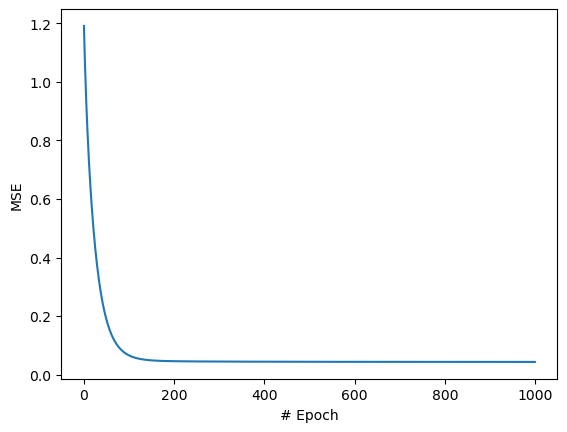

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(cost_trace)
plt.xlabel('# Epoch')
plt.ylabel('MSE')

# Listing 2-17b. Linear Regression Actual House Price vs Predicted House Price

Text(0, 0.5, 'Predicted House price')

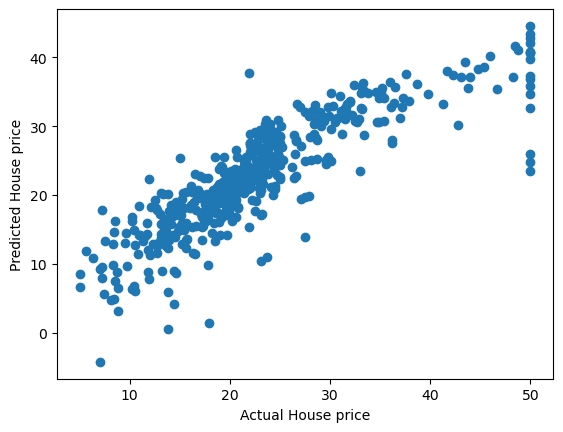

In [11]:
# Plot the Predicted house Prices vs the Actual House Prices

fig, ax = plt.subplots()
plt.scatter(target,y_pred.numpy())
ax.set_xlabel('Actual House price')
ax.set_ylabel('Predicted House price') 

# Listing 2-18. Multiclass Classification with Softmax function using Full Batch Gradient Descent

In [12]:
import tensorflow as tf
print('tensorflow version', tf.__version__)
import numpy as np
from sklearn import datasets
#from tensorflow.examples.tutorials.mnist import input_data



# Function to Read the MNIST dataset along with the labels

def read_infile():
    (train_X, train_Y), (test_X, test_Y) = tf.keras.datasets.mnist.load_data()
    train_X = train_X.reshape(-1,28*28)
    test_X = test_X.reshape(-1,28*28)
    return train_X, train_Y,test_X, test_Y

# Define the weights and biases for the neural network
class MLP(Model):
    # Set layers.
    def __init__(self,n_classes=10):
        super(MLP, self).__init__()
        # Fully-connected hidden layer.
        self.out = layers.Dense(n_classes,activation='linear')

    # Set forward pass.
    def call(self, x):
        x = self.out(x)
        return x


            
# Define the Categorical Cross Entropy that does a softmax on the final layer output logits
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

#Learning rate
learning_rate = 0.01
# Define optimizer
optimizer = tf.compat.v1.train.GradientDescentOptimizer(learning_rate)  


X_train, y_train, X_test, y_test = read_infile()
num_train_recs, num_test_recs = X_train.shape[0], X_test.shape[0]
# build the model
model = MLP(n_classes=max(y_train) +1)
model_graph = tf.function(model)

X_train = tf.constant(X_train, dtype=tf.float32 )
X_test = tf.constant(X_test, dtype=tf.float32 )
y_train = tf.constant(y_train)
y_test = tf.constant(y_test)
              
epochs = 1000
loss_trace = []
accuracy_trace = []


for i in range(epochs):
    with tf.GradientTape() as tape:
        y_pred = model_graph(X_train)
        loss = loss_fn(y_train,y_pred)
        #print(loss)
    # compute gradient
    gradients = tape.gradient(loss, model.trainable_variables)
    # update the parameters
    optimizer.apply_gradients(zip(gradients, model.trainable_variables))
              
    accuracy_ = np.mean(y_train.numpy() == np.argmax(y_pred.numpy(),axis=1))
    loss_trace.append(loss.numpy()/num_train_recs)
    accuracy_trace.append(accuracy_)
    if (((i+1) >= 100) and ((i+1) % 100 == 0 )) :
        loss_ = np.round((loss.numpy()/num_recs),4)
        print(f"Epoch {i+1} : loss: {loss_} ,accuracy:{np.round(accuracy_,4)}\n")
                            
#print('Final training result:','loss:',loss.numpy(),'accuracy:',accuracy_)    
y_pred_test = model_graph(X_test)
loss_test = loss_fn(y_test,y_pred_test).numpy()/num_test_recs
accuracy_test = np.mean(y_test.numpy() == np.argmax(y_pred_test.numpy(),axis=1))
print('Results on Test Dataset:','loss:',np.round(loss_test,4),'accuracy:',np.round(accuracy_test,4))    

tensorflow version 2.9.1
Epoch 100 : loss: 0.1338 ,accuracy:0.8789

Epoch 200 : loss: 0.0873 ,accuracy:0.9148

Epoch 300 : loss: 0.2326 ,accuracy:0.8364

Epoch 400 : loss: 0.1002 ,accuracy:0.9087

Epoch 500 : loss: 0.1162 ,accuracy:0.906

Epoch 600 : loss: 0.0862 ,accuracy:0.92

Epoch 700 : loss: 0.135 ,accuracy:0.8753

Epoch 800 : loss: 0.1392 ,accuracy:0.8938

Epoch 900 : loss: 0.6744 ,accuracy:0.739

Epoch 1000 : loss: 0.2276 ,accuracy:0.8221

Results on Test Dataset: loss: 0.0156 accuracy: 0.7982


# Listing 2-18a. Display the Actual digits vs the Predicted digits along with the images of the actual digits 

Actual digits:  [7 2 1 0 4 1 4 9 5 9]
Predicted digits: [7 2 1 0 4 1 4 9 6 9]
Actual images of the digits follow:


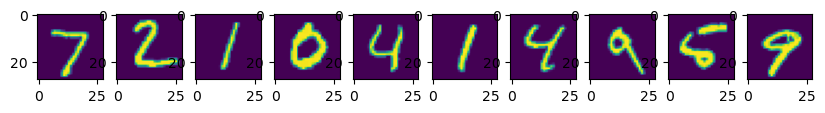

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline
f, a = plt.subplots(1, 10, figsize=(10, 2))
print('Actual digits: ', y_test[0:10].numpy())
print('Predicted digits:',np.argmax(y_pred_test[0:10],axis=1))
print('Actual images of the digits follow:')
for i in range(10):
        a[i].imshow(np.reshape(X_test[i],(28, 28)))

# Listing 2-19. Multiclass Classification with Softmax function using Stochastic Gradient Descent

In [14]:
import tensorflow as tf
print('tensorflow version', tf.__version__)
import numpy as np
from sklearn import datasets


# Function to Read the MNIST dataset along with the labels

def read_infile():
    (train_X, train_Y), (test_X, test_Y) = tf.keras.datasets.mnist.load_data()
    train_X = train_X.reshape(-1,28*28)
    test_X = test_X.reshape(-1,28*28)
    return train_X, train_Y,test_X, test_Y

# Define the weights and biases for the neural network

def build_model(input_dim,n_classes):
    # Create Tensorflow Model
    model = tf.keras.models.Sequential()
    model.add(tf.keras.Input(shape=(input_dim,)))
    model.add(tf.keras.layers.Dense(n_classes))
    return model
            
# Define the Categorical Cross Entropy that does a softmax on the final layer output logits
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

#Learning rate
learning_rate = 0.01
# Define optimizer
optimizer = tf.keras.optimizers.SGD(learning_rate)   


X_train, y_train, X_test, y_test = read_infile()
# build the model
model = build_model(X_train.shape[1],max(y_train) +1)

#X_train = tf.constant(X_train, dtype=tf.float32 )
X_test = tf.constant(X_test, dtype=tf.float32 )
#y_train = tf.constant(y_train)
y_test = tf.constant(y_test)
              
epochs = 1000
loss_trace = []
accuracy_trace = []
batch_size = 1000

num_train_recs,num_test_recs = X_train.shape[0], X_test.shape[0]
num_batches = num_train_recs // batch_size
order_ = np.arange(num_train_recs)


print(num_batches)
for i in range(epochs):
    loss, accuracy = 0,0
    np.random.shuffle(order_)
    X_train,y_train = X_train[order_], y_train[order_]
    for j in range(num_batches):
        X_train_batch = tf.constant(X_train[j*batch_size:(j+1)*batch_size],dtype=tf.float32)
        y_train_batch = tf.constant(y_train[j*batch_size:(j+1)*batch_size])  
        #print(X_train_batch,y_train_batch)
        with tf.GradientTape() as tape:
            y_pred_batch = model(X_train_batch,training=True)
            loss_ = loss_fn(y_train_batch,y_pred_batch)

        # compute gradient
        gradients = tape.gradient(loss_, model.trainable_variables)
        # update the parameters
        optimizer.apply_gradients(zip(gradients, model.trainable_variables))

        accuracy += np.sum(y_train_batch.numpy() == np.argmax(y_pred_batch.numpy(),axis=1))
        loss += batch_size*loss_.numpy()
    loss /= num_train_recs
    accuracy /= num_train_recs
    loss_trace.append(loss)
    accuracy_trace.append(accuracy)
    if (((i+1) >= 100) and ((i+1) % 100 == 0 )) :
        print(f"Epoch {i+1} : loss: {np.round(loss,4)} ,accuracy:{np.round(accuracy,4)}\n")
                            
#print('Final training result:','loss:',loss.numpy(),'accuracy:',accuracy_)    
y_pred_test = model(X_test,training=False)
loss_test = loss_fn(y_test,y_pred_test).numpy()
accuracy_test = np.mean(y_test.numpy() == np.argmax(y_pred_test.numpy(),axis=1))
print('Results on Test Dataset:','loss:',np.round(loss_test,4),'accuracy:',np.round(accuracy_test,4))  

tensorflow version 2.9.1
60
Epoch 100 : loss: 73.219 ,accuracy:0.8994

Epoch 200 : loss: 87.6804 ,accuracy:0.8932

Epoch 300 : loss: 97.9668 ,accuracy:0.8856

Epoch 400 : loss: 68.674 ,accuracy:0.9045

Epoch 500 : loss: 84.322 ,accuracy:0.8945

Epoch 600 : loss: 69.5979 ,accuracy:0.8994

Epoch 700 : loss: 87.7039 ,accuracy:0.8926

Epoch 800 : loss: 94.4417 ,accuracy:0.8851

Epoch 900 : loss: 55.3862 ,accuracy:0.9114

Epoch 1000 : loss: 74.854 ,accuracy:0.8915

Results on Test Dataset: loss: 63.0367 accuracy: 0.9129


# Listing 2-19a. Actual Digit vs Predicted digits for Softmax classification through Stochastic Gradient descent

Actual digits:  [7 2 1 0 4 1 4 9 5 9]
Predicted digits: [7 2 1 0 4 1 4 9 6 9]
Actual images of the digits follow:


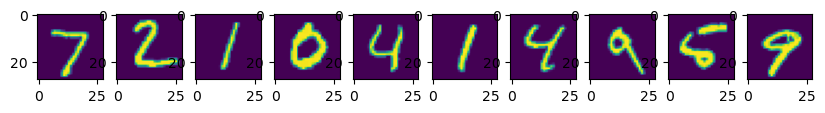

In [15]:
import matplotlib.pyplot as plt
%matplotlib inline
f, a = plt.subplots(1, 10, figsize=(10, 2))
print('Actual digits: ', y_test[0:10].numpy())
print('Predicted digits:',np.argmax(y_pred_test[0:10],axis=1))
print('Actual images of the digits follow:')
for i in range(10):
        a[i].imshow(np.reshape(X_test[i],(28, 28)))